<a href="https://colab.research.google.com/github/HLCarbon/DeepLearning/blob/main/Deep_learning_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow import math
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from keras.utils.vis_utils import plot_model

Get wine data

In [2]:
wine_data = pd.read_csv('https://raw.githubusercontent.com/derekbanas/tensorflow/main/winequalityN.csv')
wine_data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Delete rows with unknowns

In [3]:
wine_data.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [4]:
wine_data = wine_data.dropna()

Rename columns

In [5]:
wine_data.rename(columns = {'type':'white_wine'},
                 inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Change white_wine based on condition

In [6]:
wine_data.loc[wine_data['white_wine'] == 'white', 'white_wine'] = 1
wine_data.loc[wine_data['white_wine'] == 'red', 'white_wine'] = 0

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [7]:
wine_data

,white_wine,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,0,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Change quality based on condition 

In [8]:
wine_data.loc[wine_data['quality'] <= 6, 'quality'] = 0
wine_data.loc[wine_data['quality'] >= 7, 'quality'] = 1
wine_data

,white_wine,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,0
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,0
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,0
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,0
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,0,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,0
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


How many good wines?

In [9]:
(wine_data['quality'] == 1).sum()

1271

Normalize Data

In [10]:
ct = make_column_transformer(
    (MinMaxScaler(),['fixed acidity', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'])
)

Separate Features and labels

In [11]:
X = wine_data.drop('quality', axis = 1) #Features
y = wine_data['quality'] #label

Train test split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,
                                                    random_state = 66)

Transform training and test data 

In [26]:
ct.fit(X_train)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

### Build model

In [14]:
tf.random.set_seed(66)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation = tf.keras.activations.relu),
])

model_1.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

history = model_1.fit(X_train_normal, y_train, epochs = 100)

Epoch 1/100
162/162 [==============================] - 3s 5ms/step - loss: 0.4514 - accuracy: 0.8056
Epoch 2/100
162/162 [==============================] - 1s 3ms/step - loss: 0.4299 - accuracy: 0.8054
Epoch 3/100
162/162 [==============================] - 1s 3ms/step - loss: 0.4166 - accuracy: 0.8054
Epoch 4/100
162/162 [==============================] - 1s 5ms/step - loss: 0.4099 - accuracy: 0.8052
Epoch 5/100
162/162 [==============================] - 1s 4ms/step - loss: 0.4086 - accuracy: 0.8070
Epoch 6/100
162/162 [==============================] - 1s 4ms/step - loss: 0.4056 - accuracy: 0.8081
Epoch 7/100
162/162 [==============================] - 1s 3ms/step - loss: 0.4013 - accuracy: 0.8104
Epoch 8/100
162/162 [==============================] - 1s 3ms/step - loss: 0.4069 - accuracy: 0.8132
Epoch 9/100
162/162 [==============================] - 1s 5ms/step - loss: 0.4171 - accuracy: 0.8128
Epoch 10/100
162/162 [==============================] - 1s 3ms/step - loss: 0.4101 - accura

In [15]:
model_1.evaluate(X_train_normal, y_train)

162/162 [==============================] - 1s 3ms/step - loss: 0.3891 - accuracy: 0.8184


[0.38914090394973755, 0.8183752298355103]

Correlation Matrix

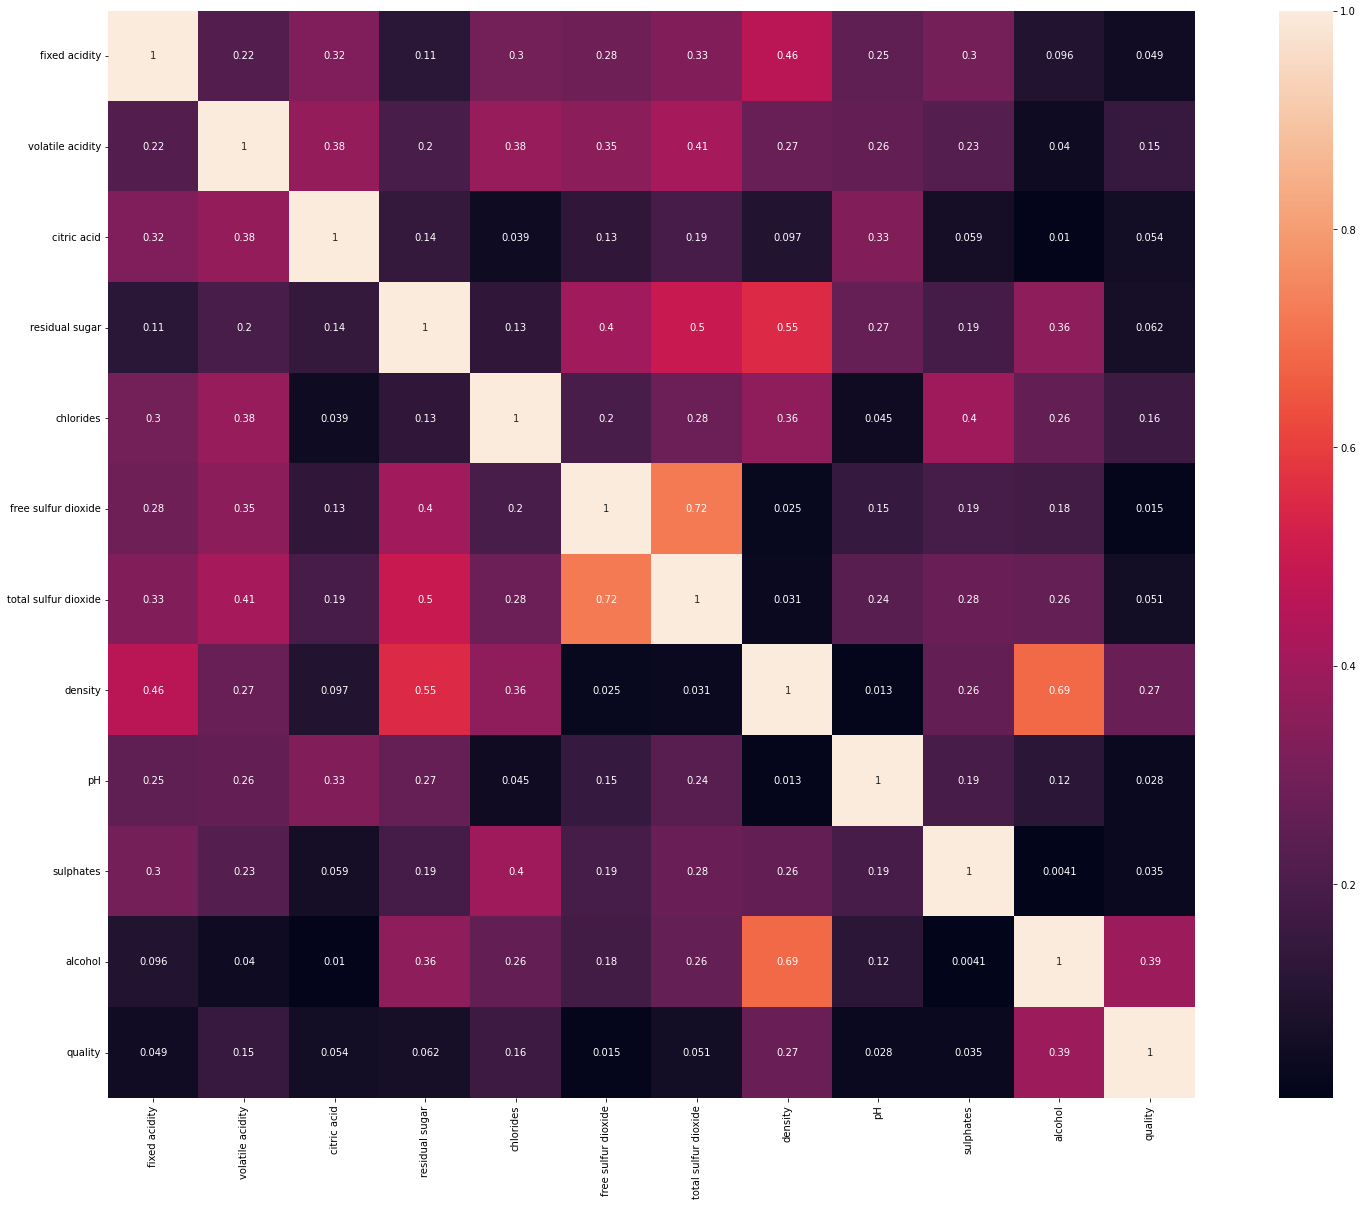

In [16]:
plt.figure(figsize = (30,20))
sns.heatmap(wine_data.corr().abs(), annot = True, square = True)

Plot Loss Curve

Text(0.5, 1.0, 'Model 1 Loss Curve')

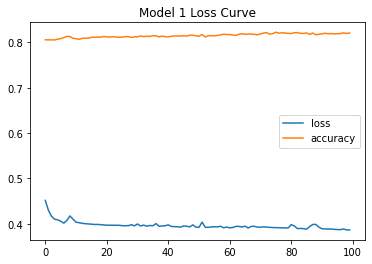

In [17]:
pd.DataFrame(history.history).plot()
plt.title('Model 1 Loss Curve')

Use call back to find ideal learning rate

In [23]:
# Create model to fit on the training data and test on testing data
tf.random.set_seed(66)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="relu")
])

model_2.compile(loss="binary_crossentropy",
optimizer="Adam",
metrics=["accuracy"])

# The callback works during model training
# At each epoch if we change the learning rate and the 
# schedular is going to give Adam the updated learning rate

# The learning rate starts at 1e-4 (.0001) and after each epoch 
# increase the learning rate 10^(epoch/20)
scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history_lr = model_2.fit(X_train_normal, y_train, 
epochs=100,
callbacks=[scheduler]) # You can have multiple callbacks

Epoch 1/100
162/162 [==============================] - 2s 4ms/step - loss: 0.4741 - accuracy: 0.8056 - lr: 1.0000e-04
Epoch 2/100
162/162 [==============================] - 0s 2ms/step - loss: 0.4616 - accuracy: 0.8056 - lr: 1.1220e-04
Epoch 3/100
162/162 [==============================] - 0s 2ms/step - loss: 0.4561 - accuracy: 0.8056 - lr: 1.2589e-04
Epoch 4/100
162/162 [==============================] - 0s 2ms/step - loss: 0.4519 - accuracy: 0.8054 - lr: 1.4125e-04
Epoch 5/100
162/162 [==============================] - 0s 2ms/step - loss: 0.4482 - accuracy: 0.8054 - lr: 1.5849e-04
Epoch 6/100
162/162 [==============================] - 0s 2ms/step - loss: 0.4447 - accuracy: 0.8054 - lr: 1.7783e-04
Epoch 7/100
162/162 [==============================] - 0s 2ms/step - loss: 0.4410 - accuracy: 0.8054 - lr: 1.9953e-04
Epoch 8/100
162/162 [==============================] - 0s 2ms/step - loss: 0.4369 - accuracy: 0.8054 - lr: 2.2387e-04
Epoch 9/100
162/162 [==============================] - 0

Text(0.5, 1.0, 'Learning Rate vs. Loss')

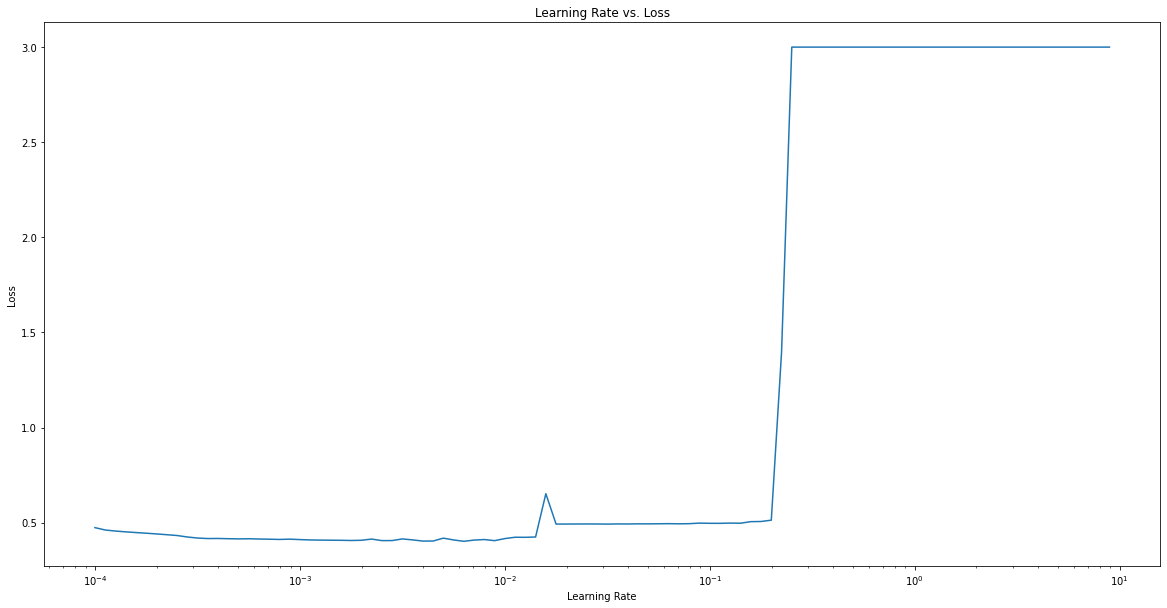

In [24]:
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(20, 10))
plt.semilogx(lrs, history_lr.history['loss'])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs. Loss")

Evaluate with test data

In [28]:
loss, acc = model_1.evaluate(X_test_normal, y_test)
print(f'Model Loss (Test Set) : {loss}')
print(f'Model accuracy (Test Set) : {acc}')

41/41 [==============================] - 0s 4ms/step - loss: 0.4618 - accuracy: 0.8020
Model Loss (Test Set) : 0.46184027194976807
Model accuracy (Test Set) : 0.8020108342170715


Understanding the model 

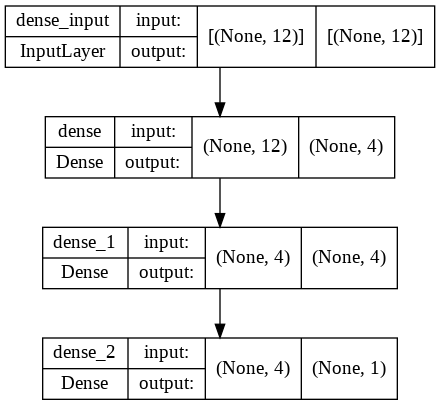

In [29]:
from tensorflow.keras.utils import plot_model
plot_model(model_1, show_shapes = True)

In [30]:
weights, biases = model_1.layers[1].get_weights()
weights, weights.shape

(array([[ 0.06952535, -0.7751815 , -0.4744096 ,  1.0195011 ],
        [ 0.3597664 ,  0.5938083 ,  0.14921305, -0.5775336 ],
        [-0.04600176, -0.48598126, -0.5355348 ,  0.35883346],
        [-0.23459457, -0.84834456,  0.79351217,  1.2876189 ]],
       dtype=float32), (4, 4))

In [32]:
biases, biases.shape

(array([-0.01071276, -0.04733676, -0.03345042, -0.03777238], dtype=float32),
 (4,))

## Multiclass classification

Download data and split into training and test 

In [35]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test,y_test)  = mnist.load_data()


11501568/11490434 [==============================] - 0s 0us/step


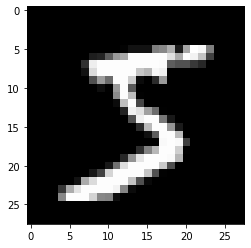

In [36]:
plt.imshow(X_train[0], cmap = 'gray')
plt.show()

Normalize the features

In [37]:
X_train = tf.keras.utils.normalize(X_train, axis =1)
X_test = tf.keras.utils.normalize(X_test, axis =1)

Show unique values in label numpy array

In [38]:
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [39]:
label_names = np.unique(y_test)

Build Model

In [55]:
tf.random.set_seed(66)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model_3.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

history = model_3.fit(X_train, 
                      y_train,
                      epochs=10,
                      validation_data=(X_test, y_test)) 

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.2820 - accuracy: 0.5607 - val_loss: 0.8054 - val_accuracy: 0.7317
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7314 - accuracy: 0.7564 - val_loss: 0.6764 - val_accuracy: 0.7763
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6550 - accuracy: 0.7826 - val_loss: 0.6293 - val_accuracy: 0.7931
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6186 - accuracy: 0.7974 - val_loss: 0.6008 - val_accuracy: 0.8069
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5955 - accuracy: 0.8138 - val_loss: 0.5836 - val_accuracy: 0.8236
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5709 - accuracy: 0.8284 - val_loss: 0.5625 - val_accuracy: 0.8380
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5500 - accuracy: 0.8383 - val_loss: 0.5454 - val_accuracy:

In [59]:
tf.random.set_seed(66)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model_4.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history_lr = model_4.fit(X_train, y_train, 
epochs=40, validation_data = (X_test, y_test),
callbacks=[scheduler]) # You can have multiple callbacks

Epoch 1/40
1875/1875 [==============================] - 8s 4ms/step - loss: 2.1876 - accuracy: 0.1915 - val_loss: 2.0627 - val_accuracy: 0.2007 - lr: 1.0000e-04
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 1.9364 - accuracy: 0.2911 - val_loss: 1.7653 - val_accuracy: 0.3396 - lr: 1.1220e-04
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6001 - accuracy: 0.4316 - val_loss: 1.4446 - val_accuracy: 0.5127 - lr: 1.2589e-04
Epoch 4/40
1875/1875 [==============================] - 7s 4ms/step - loss: 1.3326 - accuracy: 0.5781 - val_loss: 1.2177 - val_accuracy: 0.6460 - lr: 1.4125e-04
Epoch 5/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.1318 - accuracy: 0.6558 - val_loss: 1.0456 - val_accuracy: 0.6691 - lr: 1.5849e-04
Epoch 6/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.9891 - accuracy: 0.6765 - val_loss: 0.9317 - val_accuracy: 0.6850 - lr: 1.7783e-04
Epoch 7/40
1875/1875 [============

Plot with the ideal learning rate 

Text(0.5, 1.0, 'Learning Rate vs. Loss')

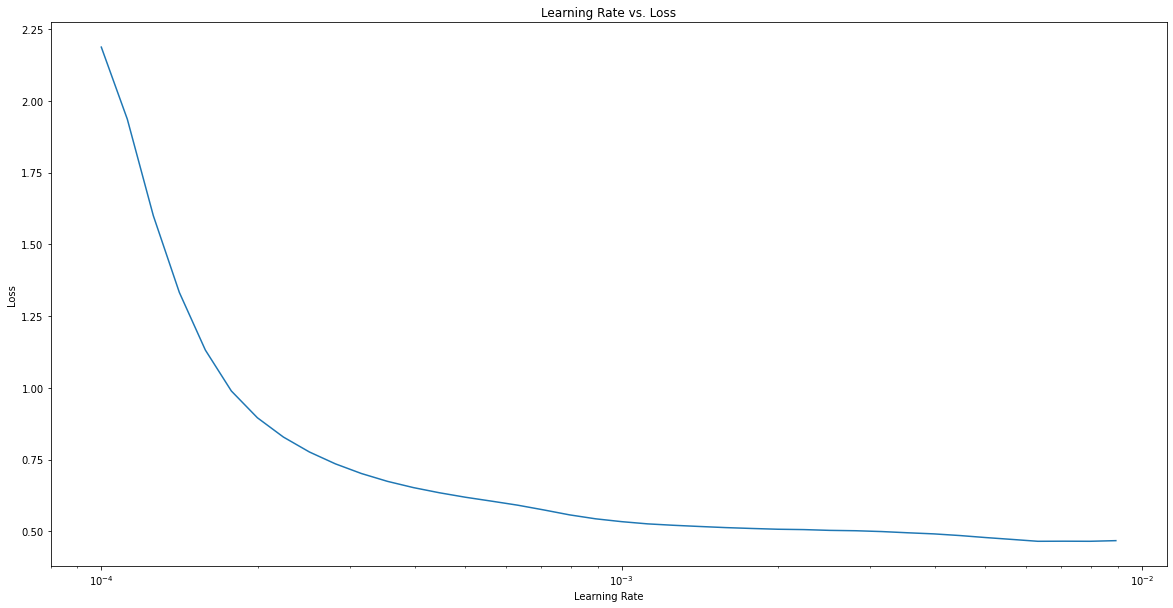

In [60]:
lrs = 1e-4 * (10 ** (tf.range(40)/20))
plt.figure(figsize=(20, 10))
plt.semilogx(lrs, history_lr.history['loss'])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs. Loss")

Make predictions with model

In [61]:
y_prob = model_4.predict(X_test)
y_prob[0]

array([2.9211724e-05, 7.1694584e-09, 7.2029456e-05, 1.3903922e-03,
       8.8430670e-07, 6.8828285e-06, 3.2986835e-10, 9.9437910e-01,
       6.0281312e-05, 4.0612081e-03], dtype=float32)

In [62]:
label_names[tf.argmax(y_prob[0])]

7

In [63]:
y_test[0]

7

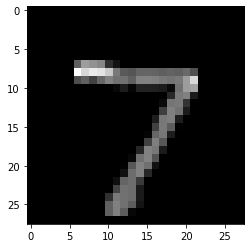

In [64]:
plt.imshow(X_test[0], cmap = 'gray')
plt.show()